# A Brief Into to AI

This series of notebooks is intended to give you a quick taste of how you can build on your knowledge of Python to start exploring the field of AI.

Python is the *de facto* language of AI. While other languages can be used, currently, the vast majority of AI development is in Python. This is one reason that Python just became the [most used programming language on GitHub](https://github.blog/news-insights/octoverse/octoverse-2024/)! So, you have a great start there!

Artificial Intelligence is a huge field, with a long history and many applications. We can't possibly cover everything here! 

> Interested in more on AI, especially as it is used in analyzing biological data?? Enroll in [AI in Biology](https://aibiology.github.io/)!! Arthur Porto and I typically teach this every Spring semester.

## History of AI in one image

![Brief history of AI from NVIDIA Blog](https://blogs.nvidia.com/wp-content/uploads/2016/07/Deep_Learning_Icons_R5_PNG.jpg-672x427.png)

Key points:
* AI is not new, the term was coined in the 1955!
* Lots of developments, but many setbacks over the years
* GPUs (Graphical Processing Units) changed things in 2012 with AlexNet
* Availability of large-scale data, and advances in computing power have fueled the current AI boom
* AI's history has many "winters" where large investments and over-sold hype fail to produce results and people look elsewhere...be careful!



## Machine Learning

One category of AI is Machine Learning. These methods were early attempts to tap into computer's abilities to find patterns in data. There are two main categories of machine learning:

* **Supervised Learning**: A type of machine learning where the model is trained on labeled data, meaning the input data is paired with the correct output. The goal is to learn a mapping from inputs to outputs to make predictions on new, unseen data.

* **Unsupervised Learning:** A type of machine learning where the model is trained on unlabeled data, meaning the input data has no corresponding output labels. The goal is to find hidden patterns or intrinsic structures within the input data.


## An example

Let's start our exploration with an example of supervised machine learning. 

In [14]:
import pandas as pd
import numpy as np

# Generate some data using the formula y = 2x + 1 + error

# Set the seed for reproducibility
np.random.seed(0)

# Generate 100 random x values between 0 and 1
x = np.random.rand(100, 1)

# Generate random error values from a normal distribution with mean 0 and standard deviation 0.1
error = np.random.normal(0, 0.2, (100, 1))

# Calculate y
y = 2 * x + 1 + error

# Create a DataFrame to store our X and y values
data = pd.DataFrame(data=np.hstack([x, y]), columns=['x', 'y'])

# Print the first 5 rows of the data
print(data.head())

          x         y
0  0.548814  1.864597
1  0.715189  2.610544
2  0.602763  2.298659
3  0.544883  1.782518
4  0.423655  2.144960


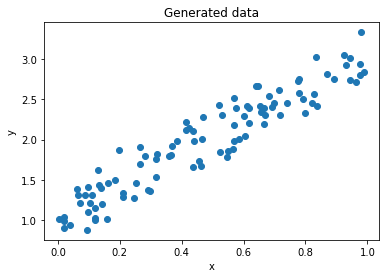

In [15]:
# Plot the data
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated data')
plt.show()

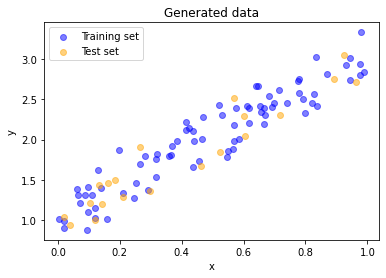

In [16]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.2, random_state=0)

# Plot the training and test sets
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.scatter(X_test, y_test, color='orange', label='Test set', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generated data')
plt.show()


/apps/python/3.10/lib/python3.10/site-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


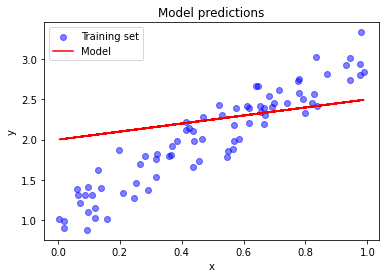

In [43]:
# Guess at slope and intercept
slope = 0.5
intercept = 2

# Make predictions
y_pred = slope * X_train + intercept

# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.plot(X_train, y_pred, color='red', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model predictions')
plt.show()

In [44]:
# Calculate the mean squared error
mse = np.mean((y_pred - y_train) ** 2)
print('Mean squared error:', mse)

Mean squared error: 0.25620701380452926


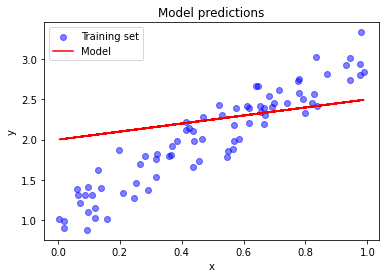

In [45]:
def backward_step(X_train, y_train, slope, intercept, learning_rate):
    # Make predictions
    y_pred = slope * X_train + intercept

    # Calculate the error
    error = y_train - y_pred

    # Calculate the slope and intercept gradients
    slope_gradient = -2 * np.mean(X_train * error)
    intercept_gradient = -2 * np.mean(error)

    # Update the slope and intercept
    slope = slope - learning_rate * slope_gradient
    intercept = intercept - learning_rate * intercept_gradient

    return slope, intercept

backward_step(X_train, y_train, slope, intercept, 1)
y_pred = slope * X_train + intercept

# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.plot(X_train, y_pred, color='red', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model predictions')
plt.show()


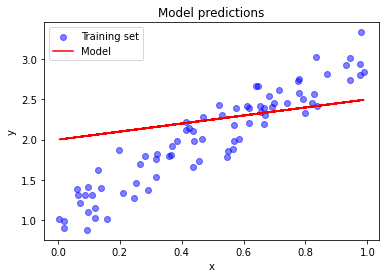

Mean squared error: 0.25620701380452926


In [46]:
# Do this 100 times animating the plot
from matplotlib.animation import FuncAnimation

# Create a figure and axis
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
line, = ax.plot(X_train, slope * X_train + intercept, color='red', label='Model')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Model predictions')

# Define the update function
def update(frame):
    global slope, intercept
    slope, intercept = backward_step(X_train, y_train, slope, intercept, 1)
    line.set_ydata(slope * X_train + intercept)
    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200)
plt.show()

# Calculate the mean squared error
y_pred = slope * X_train + intercept

mse = np.mean((y_pred - y_train) ** 2)
print('Mean squared error:', mse)
